## Python Example 
**Goal: Construct a prediction filter for our female speech 
signal of order 10, which minimizes the mean-squared 
prediction error.**

In [1]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
%matplotlib inline

* Read in the female speech sound:

In [2]:
from sound import *
x,fs=wavread('speech8kHz.wav')
np.shape(x)

('Number of channels: ', 1)
('Number of bytes per sample:', 2)
('Sampling rate: ', 8000)
('Number of samples:', 60246)


(60246,)

* Make $x$ a matrix of float type and transpose it into a column, normalize to $-1<x<1$:

In [3]:
x = np.matrix(x,dtype=float).T / 2 ** 15

* Listen to it, turning x into a 1- dimensional array type for the argument:

In [4]:
sound(np.array(x.T)[0] * 2 ** 15, fs)

* done


* Construct our Matrix A from x:

In [5]:
A = np.matrix(np.zeros((60000,10)));
for m in range(0,60000):
    A[m, :] = x[m + np.arange(10)].T

* Construct our desired target signal d, one sample into the future, we start with the first 10 samples already in the prediction filter, then the 11th sample is the first to be predicted:

In [6]:
d = x[np.arange(10, 60010)]

* Compute the prediction filter:

In [7]:
h = np.linalg.inv(A.T*A) * A.T * d
np.flipud(h)

matrix([[ 1.7468863 ],
        [-1.37239144],
        [ 1.1638738 ],
        [-1.03131811],
        [ 0.95837142],
        [-1.01646431],
        [ 0.58005416],
        [-0.21918912],
        [ 0.18471043],
        [-0.10776386]])

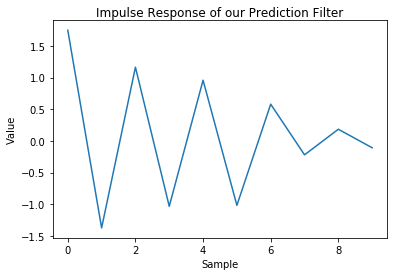

In [8]:
plt.plot(np.flipud(h))
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Impulse Response of our Prediction Filter')

* Then our prediction filter, with the delay in the encoder becomes (to compare it with the original signal):

In [9]:
hpred = np.vstack([0, np.flipud(h)])

* The predicted values are now obtained by appying these coefficients as an FIR filter:

In [10]:
xpred = sp.lfilter(np.array(hpred.T)[0], 1, np.array(x.T)[0])

* Now we can plot the predicted values on top of the actual original signal values, to see how accurate our prediction is:

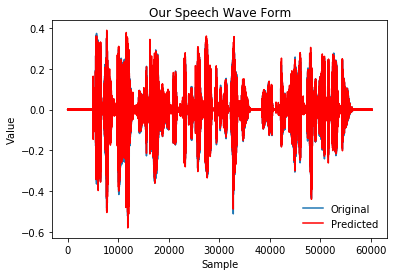

In [11]:
plt.plot(x);
plt.plot(xpred,'red')
plt.legend(('Original','Predicted'))
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Our Speech Wave Form')

* Our corresponding **prediction error** filter (which is in the **encoder**) is, $H_{perr}(z)=1-z^{-1}\cdot H(z)$, in Python

In [12]:
hperr = np.vstack([1, -np.flipud(h)])
hperr

matrix([[ 1.        ],
        [-1.7468863 ],
        [ 1.37239144],
        [-1.1638738 ],
        [ 1.03131811],
        [-0.95837142],
        [ 1.01646431],
        [-0.58005416],
        [ 0.21918912],
        [-0.18471043],
        [ 0.10776386]])

* The prediction error e(n) is obtained using our prediction error filter:

In [13]:
e = sp.lfilter(np.array(hperr.T)[0], 1, np.array(x.T)[0])

* Make a matrix type out of it (row matrix)

In [14]:
e = np.matrix(e)

* Error power per sample:

In [15]:
e * e.T / np.max(np.shape(e))

matrix([[ 0.00023865]])

* Compare that with the mean squared signal power per sample:

In [16]:
x.T * x/np.max(np.shape(x))

matrix([[ 0.00562755]])

* Which is more than 10 times as big as the prediction error! Which shows that it works!

* Listen to the error signal:

In [17]:
sound(2 ** 15 * np.array(e)[0],fs)

* done


* Take a look at the signal and it's prediction error:

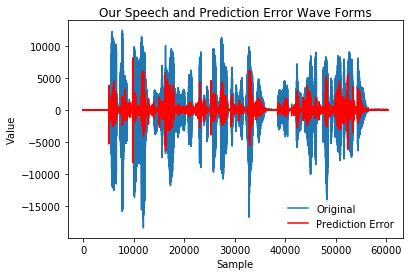

In [18]:
plt.plot(2**15*x)
plt.plot(2**15*e.T,'r')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Our Speech and Prediction Error Wave Forms')
plt.legend(('Original', 'Prediction Error'))

* The **decoder** uses the reverse filter structure $$H_{prec} = \frac{1}{1=z^{-1}\cdot H(z)} = \frac{1}{H_{perr}(z)}$$ hence we use the following filter command to generate the reconstructed signal,

In [19]:
xrec = sp.lfilter([1], np.array(hperr.T)[0], np.array(e)[0])

* Plot original for comparison and plot decoded reconstructed on top in red:

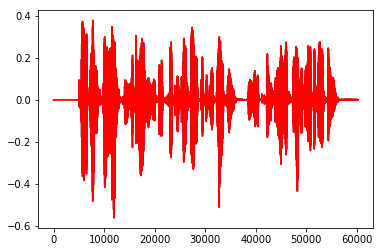

In [20]:
plt.plot(x)
plt.plot(xrec,'r')

**Observe: ** The decoded, reconstructed is **identical** to the original, as expected.